In [1]:
%matplotlib notebook 
import json
import numpy 
import os
import sys
import time

import skimage.io
import skimage.transform
import skimage.color
import skimage.feature 
import skimage.measure

import scipy.signal
import scipy.ndimage

import matplotlib.pyplot
import matplotlib.patches

/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


<IPython.core.display.Javascript object>


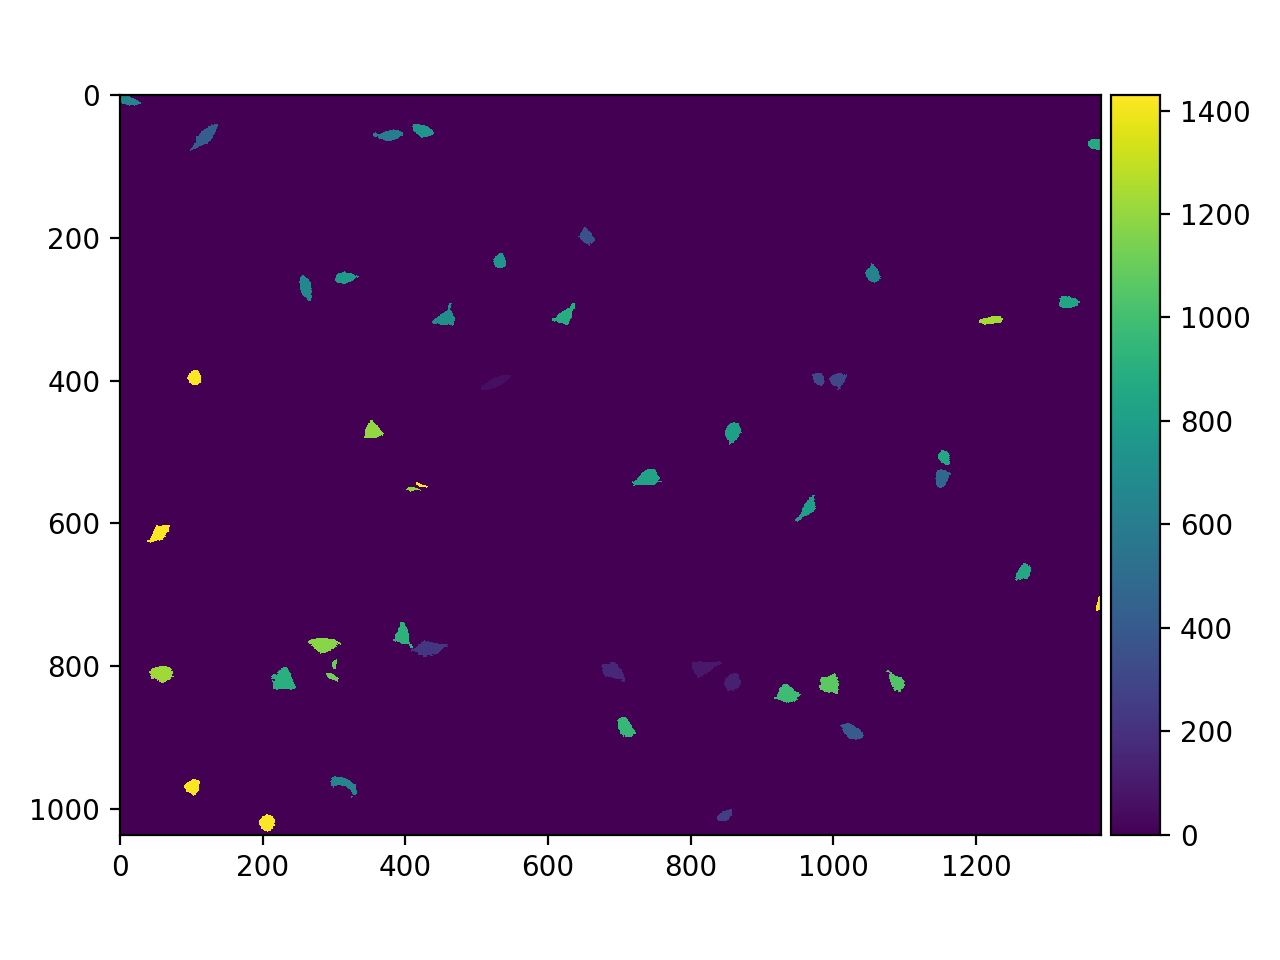

In [6]:
image_name = '../data/mask/refdataB_001.png'
I = skimage.io.imread(image_name)
skimage.io.imshow(I)

In [7]:
# get bounding box 
# minrow, mincol, maxrow, maxcol
region_list = skimage.measure.regionprops(I)

In [8]:
def to_dict(x1, y1, x2, y2):
    return {
        "class": "cell",
        "x1": y1,
        "x2": y2,
        "y1": x1,
        "y2": x2
    }

def box_list(pathname):
    image = skimage.io.imread(pathname)
    
    region_list = skimage.measure.regionprops(image)
    
    return [to_dict(*region.bbox) for region in region_list]

In [9]:
# read all image 
import glob

pathnames = glob.glob("../data/mask/ref*.png")

template_list = []

for pathname in pathnames:
    template = {
        "boxes": box_list(pathname),
        "filename": os.path.basename(pathname),
        "shape" : [1376, 1038, 3]
    }
    
    template_list += [template]

KeyboardInterrupt: 

In [6]:
#template_list[0]

In [10]:
# load mitotic cells 
filename_mitosis = '../data/mitosis_templates.json'
with open(filename_mitosis, "r") as f:
    mitosis_list = json.loads(f.read())
    

In [8]:
# sort the stuff 
sorted_mitosis_list = sorted(mitosis_list, key=lambda element: element["filename"])
sorted_cell_list = sorted(template_list, key=lambda element: element["filename"])
sorted_mitosis_list[1]



{'boxes': [{'class': 'mitosis', 'x1': 410, 'x2': 451, 'y1': 30, 'y2': 71}],
 'filename': '~/mitosis_detection/data/cetres.b/refdataB_C2_014.png',
 'shape': [1376, 1038, 3]}

In [9]:
#sorted_cell_list[13]

<IPython.core.display.Javascript object>


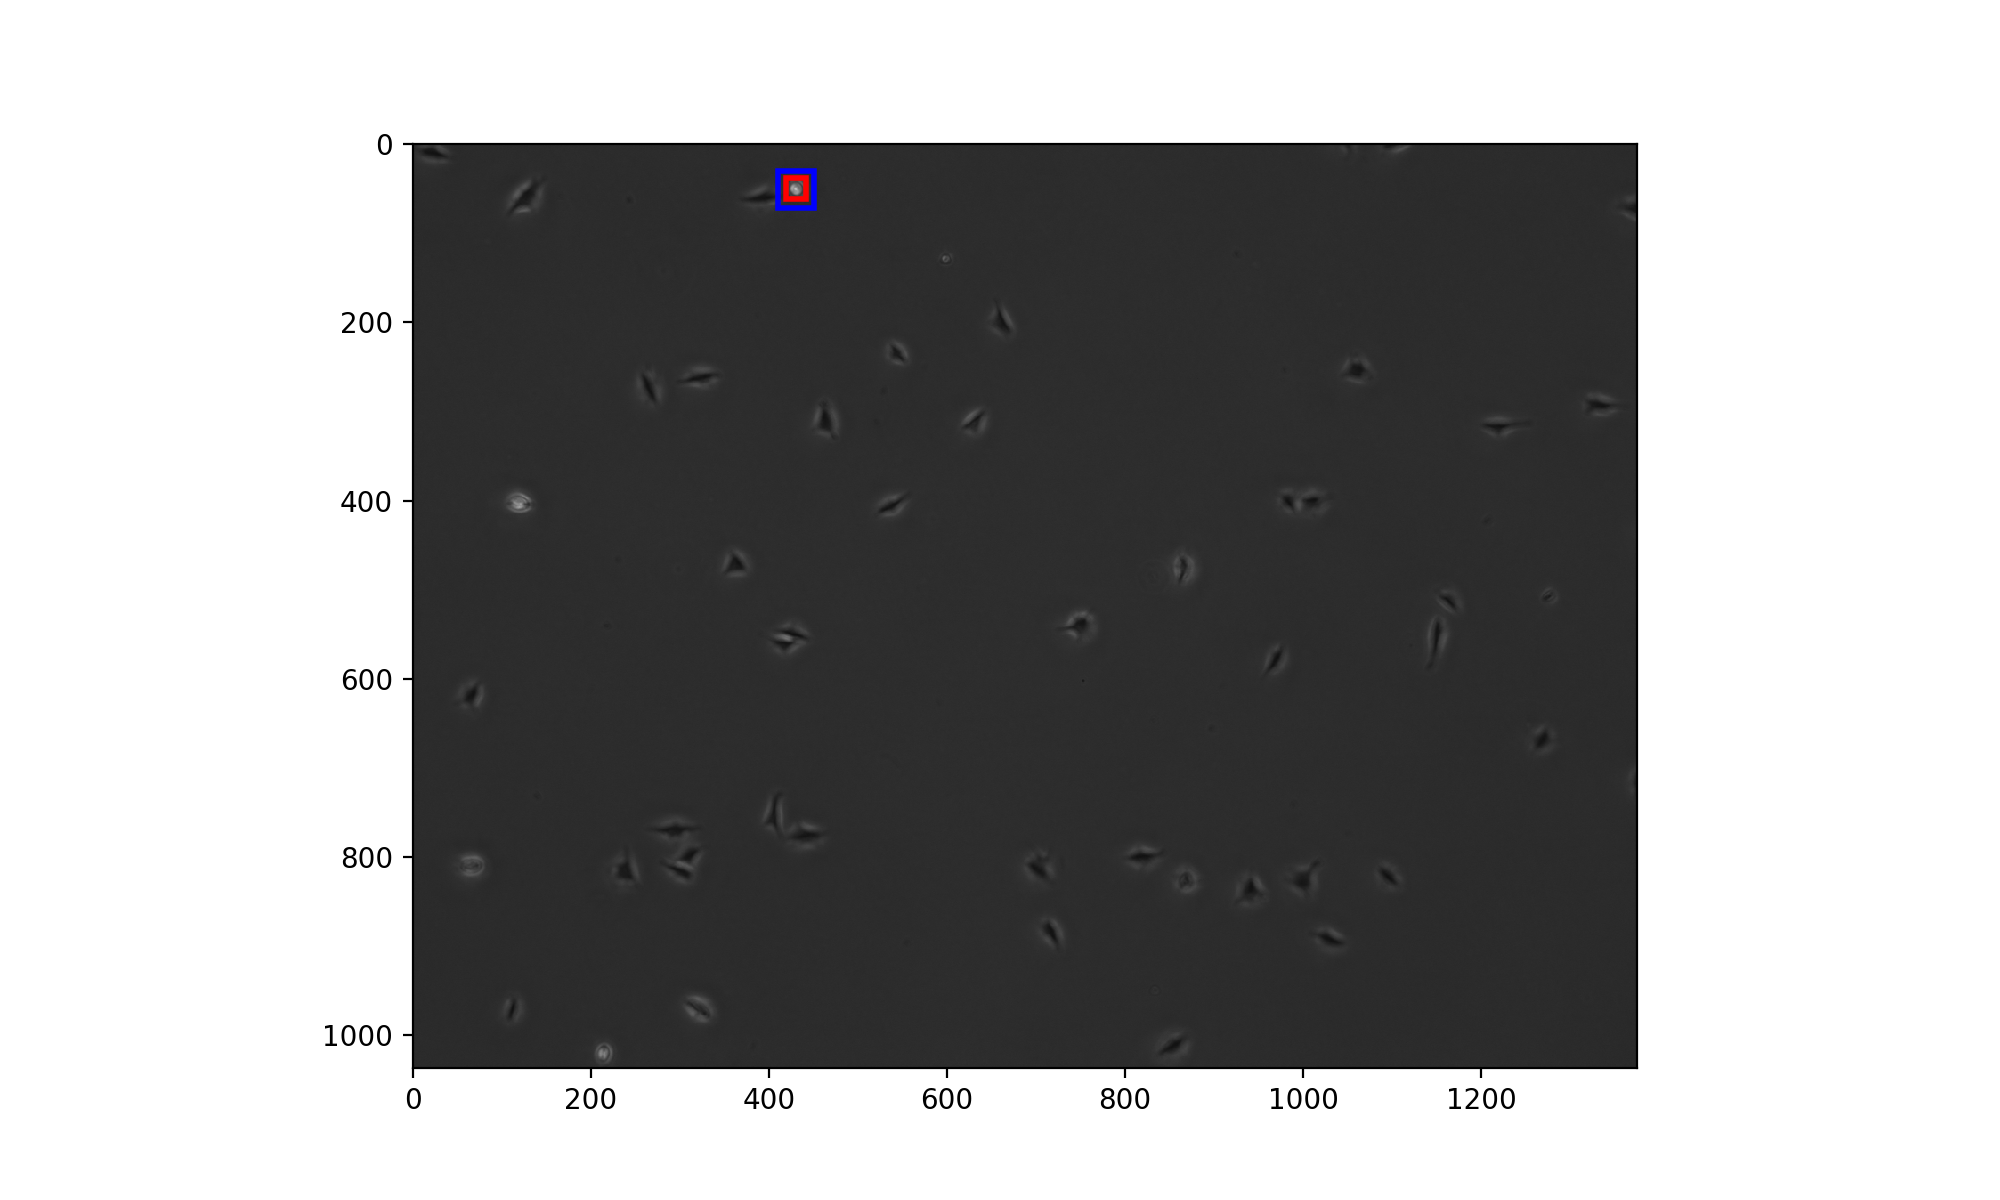

In [10]:
I_cell = skimage.io.imread("../data/cetres.b//refdataB_C2_014.png")


fig, ax = matplotlib.pyplot.subplots(figsize=(10, 6))
ax.imshow(I_cell,cmap="gray")     
    
minr, minc, maxr, maxc = [38, 419, 61, 442]
rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, 
                                    maxr - minr, fill = False, edgecolor = 'red', 
                                    linewidth = 2)
ax.add_patch(rect)


minr, minc, maxr, maxc = [30, 410, 71, 451]
rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, 
                                    maxr - minr, fill = False, edgecolor = 'blue', 
                                    linewidth = 2)
ax.add_patch(rect)
        



In [11]:
def norm2(x1,x2,y1,y2):
    return (numpy.sqrt((x1-x2)*(x1-x2) + (y1 - y2)*(y1 - y2)))

def same_bounding_box(bbox1, bbox2):
    x1 = 1/2 * (bbox1["x1"] + bbox1["x2"]) 
    x2 = 1/2 * (bbox2["x1"] + bbox2["x2"]) 
    y1 = 1/2 * (bbox1["y1"] + bbox1["y2"]) 
    y2 = 1/2 * (bbox2["y1"] + bbox2["y2"])
    return (norm2(x1,x2,y1,y2) < 10)

In [12]:
len(sorted_mitosis_list)

315

In [13]:
cell_list = sorted_cell_list[13]
mito_list = sorted_mitosis_list[1]

In [14]:
def remove_duplicates(mito_list, cell_list):
    bad_cells = []

    for mito_box in mito_list["boxes"]:
        for cell_box in cell_list["boxes"]:
            if same_bounding_box(cell_box, mito_box):
                bad_cells += [cell_box]
                break

    for bad_cell in bad_cells:
        try:
            cell_list["boxes"].remove(bad_cell)
        except ValueError as e:
            continue
            
    return bad_cells

In [15]:
duplicate_cells = []

for mito_list in sorted_mitosis_list:
    for cell_list in sorted_cell_list:
        if cell_list["filename"][-7:] == mito_list["filename"][-7:]:
            duplicate_cells += [remove_duplicates(mito_list, cell_list)]

In [16]:
len(sum(duplicate_cells, []))

2054

In [17]:
sorted_cell_list[1]


{'boxes': [{'class': 'cell', 'x1': 511, 'x2': 549, 'y1': 393, 'y2': 416},
  {'class': 'cell', 'x1': 798, 'x2': 843, 'y1': 793, 'y2': 817},
  {'class': 'cell', 'x1': 850, 'x2': 874, 'y1': 808, 'y2': 835},
  {'class': 'cell', 'x1': 678, 'x2': 711, 'y1': 796, 'y2': 826},
  {'class': 'cell', 'x1': 409, 'x2': 459, 'y1': 765, 'y2': 788},
  {'class': 'cell', 'x1': 837, 'x2': 863, 'y1': 1002, 'y2': 1018},
  {'class': 'cell', 'x1': 997, 'x2': 1022, 'y1': 389, 'y2': 414},
  {'class': 'cell', 'x1': 972, 'x2': 990, 'y1': 391, 'y2': 409},
  {'class': 'cell', 'x1': 645, 'x2': 667, 'y1': 184, 'y2': 211},
  {'class': 'cell', 'x1': 1013, 'x2': 1044, 'y1': 880, 'y2': 904},
  {'class': 'cell', 'x1': 101, 'x2': 137, 'y1': 42, 'y2': 79},
  {'class': 'cell', 'x1': 1145, 'x2': 1165, 'y1': 525, 'y2': 555},
  {'class': 'cell', 'x1': 1090, 'x2': 1109, 'y1': 0, 'y2': 3},
  {'class': 'cell', 'x1': 361, 'x2': 400, 'y1': 48, 'y2': 64},
  {'class': 'cell', 'x1': 1047, 'x2': 1068, 'y1': 235, 'y2': 263},
  {'class': '

In [8]:
#with open('../data/cell_templates.json', 'w') as fp:
#    json.dump(sorted_cell_list, fp, indent=4)


with open('../data/mitosis_templates.json', 'r') as fp:
    m_list = json.loads(fp.read())
    
with open('../data/cell_templates.json', 'r') as fp:
    c_list = json.loads(fp.read())

    

next we need to merge the cell list c_list and the mitosis list m_list. 

But first we increase the size of the bounding boxes of all cells 

In [9]:
sorted_c_list = sorted(c_list, key=lambda x: x["filename"])
sorted_m_list = sorted(m_list, key=lambda x: x["filename"])



In [10]:
y, x = skimage.io.imread("../data/mask/refdataB_001.png").shape
print(x,y)

for element in sorted_c_list:
    print(element["filename"])
    for box in element["boxes"]:
        box["x1"] = max(0, box["x1"] - 10)
        box["x2"] = min(x, box["x2"] + 10)
        box["y1"] = max(0, box["y1"] - 10)
        box["y2"] = min(y, box["y2"] + 10)



1376 1037
~/mitosis_detection/data/cetres.b/refdataB_C2_001.png
~/mitosis_detection/data/cetres.b/refdataB_C2_004.png
~/mitosis_detection/data/cetres.b/refdataB_C2_005.png
~/mitosis_detection/data/cetres.b/refdataB_C2_006.png
~/mitosis_detection/data/cetres.b/refdataB_C2_007.png
~/mitosis_detection/data/cetres.b/refdataB_C2_008.png
~/mitosis_detection/data/cetres.b/refdataB_C2_009.png
~/mitosis_detection/data/cetres.b/refdataB_C2_010.png
~/mitosis_detection/data/cetres.b/refdataB_C2_011.png
~/mitosis_detection/data/cetres.b/refdataB_C2_012.png
~/mitosis_detection/data/cetres.b/refdataB_C2_013.png
~/mitosis_detection/data/cetres.b/refdataB_C2_014.png
~/mitosis_detection/data/cetres.b/refdataB_C2_015.png
~/mitosis_detection/data/cetres.b/refdataB_C2_016.png
~/mitosis_detection/data/cetres.b/refdataB_C2_017.png
~/mitosis_detection/data/cetres.b/refdataB_C2_018.png
~/mitosis_detection/data/cetres.b/refdataB_C2_019.png
~/mitosis_detection/data/cetres.b/refdataB_C2_020.png
~/mitosis_detectio

In [11]:
m_idx = 0

for c in sorted_c_list:
    if sorted_m_list[m_idx]["filename"] == c["filename"]:
        c["boxes"] += sorted_m_list[m_idx]["boxes"]
        m_idx += 1
        

In [12]:
with open('../data/all_cell_templates_enlarged.json', 'w') as fp:
    json.dump(sorted_c_list, fp, indent=4)